## 线性回归

线性回归基于几个简单的假设：
首先，假设自变量$\mathbf{x}$和因变量$y$之间的关系是线性的，
即$y$可以表示为$\mathbf{x}$中元素的加权和，这里通常允许包含观测值的一些噪声；
其次，我们假设任何噪声都比较正常，如噪声遵循正态分布。

为了解释*线性回归*，我们举一个实际的例子：
我们希望根据房屋的面积（平方英尺）和房龄（年）来估算房屋价格（美元）。
为了开发一个能预测房价的模型，我们需要收集一个真实的数据集。
这个数据集包括了房屋的销售价格、面积和房龄。
在机器学习的术语中，该数据集称为*训练数据集*（training data set）
或*训练集*（training set）。
每行数据（比如一次房屋交易相对应的数据）称为*样本*（sample），
也可以称为*数据点*（data point）或*数据样本*（data instance）。
我们把试图预测的目标（比如预测房屋价格）称为*标签*（label）或*目标*（target）。
预测所依据的自变量（面积和房龄）称为*特征*（feature）或*协变量*（covariate）。

通常，我们使用$n$来表示数据集中的样本数。
对索引为$i$的样本，其输入表示为$\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$，
其对应的标签是$y^{(i)}$。

## 线性模型

线性假设是指目标（房屋价格）可以表示为特征（面积和房龄）的加权和，如下面的式子：

$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b.$$
:eqlabel:`eq_price-area`

 :eqref:`eq_price-area`中的$w_{\mathrm{area}}$和$w_{\mathrm{age}}$
称为*权重*（weight），权重决定了每个特征对我们预测值的影响。
$b$称为*偏置*（bias）、*偏移量*（offset）或*截距*（intercept）。
偏置是指当所有特征都取值为0时，预测值应该为多少。
即使现实中不会有任何房子的面积是0或房龄正好是0年，我们仍然需要偏置项。
如果没有偏置项，我们模型的表达能力将受到限制。
严格来说， :eqref:`eq_price-area`是输入特征的一个
*仿射变换*（affine transformation）。
仿射变换的特点是通过加权和对特征进行*线性变换*（linear transformation），
并通过偏置项来进行*平移*（translation）。

给定一个数据集，我们的目标是寻找模型的权重$\mathbf{w}$和偏置$b$，
使得根据模型做出的预测大体符合数据里的真实价格。
输出的预测值由输入特征通过*线性模型*的仿射变换决定，仿射变换由所选权重和偏置确定。

而在机器学习领域，我们通常使用的是高维数据集，建模时采用线性代数表示法会比较方便。
当我们的输入包含$d$个特征时，我们将预测结果$\hat{y}$
（通常使用“尖角”符号表示$y$的估计值）表示为：

$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b.$$

将所有特征放到向量$\mathbf{x} \in \mathbb{R}^d$中，
并将所有权重放到向量$\mathbf{w} \in \mathbb{R}^d$中，
我们可以用点积形式来简洁地表达模型：

$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$$
:eqlabel:`eq_linreg-y`

在 :eqref:`eq_linreg-y`中，
向量$\mathbf{x}$对应于单个数据样本的特征。
用符号表示的矩阵$\mathbf{X} \in \mathbb{R}^{n \times d}$
可以很方便地引用我们整个数据集的$n$个样本。
其中，$\mathbf{X}$的每一行是一个样本，每一列是一种特征。

对于特征集合$\mathbf{X}$，预测值$\hat{\mathbf{y}} \in \mathbb{R}^n$
可以通过矩阵-向量乘法表示为：

$${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b$$

这个过程中的求和将使用广播机制。



## 解析解

线性回归刚好是一个很简单的优化问题。
与我们将在本书中所讲到的其他大部分模型不同，线性回归的解可以用一个公式简单地表达出来，
这类解叫作解析解（analytical solution）。
首先，我们将偏置$b$合并到参数$\mathbf{w}$中，合并方法是在包含所有参数的矩阵中附加一列。
我们的预测问题是最小化$\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$。
这在损失平面上只有一个临界点，这个临界点对应于整个区域的损失极小点。
将损失关于$\mathbf{w}$的导数设为0，得到解析解：

$$\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.$$

像线性回归这样的简单问题存在解析解，但并不是所有的问题都存在解析解。
解析解可以进行很好的数学分析，但解析解对问题的限制很严格，导致它无法广泛应用在深度学习里。

## 随机梯度下降

梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值）
关于模型参数的导数（在这里也可以称为梯度）。
但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集。
因此，我们通常会在每次需要计算更新的时候随机抽取一小批样本，
这种变体叫做*小批量随机梯度下降*（minibatch stochastic gradient descent）。

在每次迭代中，我们首先随机抽样一个小批量$\mathcal{B}$，
它是由固定数量的训练样本组成的。
然后，我们计算小批量的平均损失关于模型参数的导数（也可以称为梯度）。
最后，我们将梯度乘以一个预先确定的正数$\eta$，并从当前参数的值中减掉。

我们用下面的数学公式来表示这一更新过程（$\partial$表示偏导数）：

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$

算法的步骤如下：
（1）初始化模型参数的值，如随机初始化；
（2）从数据集中随机抽取小批量样本且在负梯度的方向上更新参数，并不断迭代这一步骤。
对于平方损失和仿射变换，我们可以明确地写成如下形式:

$$\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}$$
:eqlabel:`eq_linreg_batch_update`

公式 :eqref:`eq_linreg_batch_update`中的$\mathbf{w}$和$\mathbf{x}$都是向量。

$|\mathcal{B}|$表示每个小批量中的样本数，这也称为*批量大小*（batch size）。
$\eta$表示*学习率*（learning rate）。

批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的。
这些可以调整但不在训练过程中更新的参数称为*超参数*（hyperparameter）。
*调参*（hyperparameter tuning）是选择超参数的过程。
超参数通常是我们根据训练迭代结果来调整的，
而训练迭代结果是在独立的*验证数据集*（validation dataset）上评估得到的。



## 线性回归的从零开始实现

从零开始实现整个方法，包括数据流水线、模型、损失函数和小批量随机梯度下降优化器。

In [9]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### 生成数据集

生成一个包含1000个样本的数据集，
每个样本包含从标准正态分布中采样的2个特征。
我们的合成数据集是一个矩阵$\mathbf{X}\in \mathbb{R}^{1000 \times 2}$。

我们使用线性模型参数$\mathbf{w} = [2, -3.4]^\top$、$b = 4.2$
和噪声项$\epsilon$生成数据集及其标签：

$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$$

$\epsilon$可以视为模型预测和标签时的潜在观测误差。
在这里我们认为标准假设成立，即$\epsilon$服从均值为0的正态分布。
为了简化问题，我们将标准差设为0.01。
下面的代码生成合成数据集。

In [10]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [11]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)  

features中的每一行都包含一个二维数据样本，labels中的每一行都包含一维标签值（一个标量）

In [13]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.4836, -0.8441]) 
label: tensor([6.1063])


通过生成第二个特征features[:, (1)]和labels的散点图，可以直观观察到两者之间的线性关系

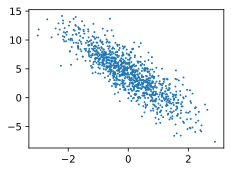

In [14]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

### 读取数据集

定义一个`data_iter`函数，
该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为`batch_size`的小批量

每个小批量包含一组特征和标签。

In [15]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

读取第一个小批量数据样本并打印。
每个批量的特征维度显示批量大小和输入特征数。
同样的，批量的标签形状与`batch_size`相等。

In [16]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.3747,  0.7438],
        [-0.9089, -1.8827],
        [ 1.7131,  0.8056],
        [ 0.8595,  1.3511],
        [-1.8953, -0.4136],
        [-0.1327, -0.5880],
        [ 0.6790, -0.2707],
        [-0.6167, -1.1107],
        [-0.4787, -0.1805],
        [-0.5738, -0.6744]]) 
 tensor([[2.4371],
        [8.7851],
        [4.8822],
        [1.3283],
        [1.8363],
        [5.9220],
        [6.4880],
        [6.7299],
        [3.8554],
        [5.3370]])


当我们运行迭代时，我们会连续地获得不同的小批量，直至遍历完整个数据集。
上面实现的迭代对教学来说很好，但它的执行效率很低，可能会在实际问题上陷入麻烦。
例如，它要求我们将所有数据加载到内存中，并执行大量的随机内存访问。
在深度学习框架中实现的内置迭代器效率要高得多，
它可以处理存储在文件中的数据和数据流提供的数据。

### 初始化模型参数

通过从均值为0、标准差为0.01的正态分布中采样随机数来初始化权重，
并将偏置初始化为0。

In [17]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

### 定义模型

定义模型，将模型的输入和参数同模型的输出关联起来。

要计算线性模型的输出，只需计算输入特征$\mathbf{X}$和模型权重$\mathbf{w}$的矩阵-向量乘法后加上偏置$b$。
注意，上面的$\mathbf{Xw}$是一个向量，而$b$是一个标量。

In [18]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

### 定义损失函数

因为需要计算损失函数的梯度，所以我们应该先定义损失函数。
这里我们使用平方损失函数。
在实现中，我们需要将真实值`y`的形状转换为和预测值`y_hat`的形状相同。

In [19]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 定义优化算法

在每一步中，使用从数据集中随机抽取的一个小批量，然后根据参数计算损失的梯度。
接下来，朝着减少损失的方向更新我们的参数。

下面的函数实现小批量随机梯度下降更新。
该函数接受模型参数集合、学习速率和批量大小作为输入。每
一步更新的大小由学习速率`lr`决定。
因为我们计算的损失是一个批量样本的总和，所以我们用批量大小（`batch_size`）
来规范化步长，这样步长大小就不会取决于我们对批量大小的选择。

In [20]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 训练

在每次迭代中，我们读取一小批量训练样本，并通过我们的模型来获得一组预测。
计算完损失后，我们开始反向传播，存储每个参数的梯度。
最后，我们调用优化算法`sgd`来更新模型参数。

概括一下，我们将执行以下循环：

* 初始化参数
* 重复以下训练，直到完成
    * 计算梯度$\mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
    * 更新参数$(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$

在每个*迭代周期*（epoch）中，我们使用`data_iter`函数遍历整个数据集，
并将训练数据集中所有样本都使用一次（假设样本数能够被批量大小整除）。
这里的迭代周期个数`num_epochs`和学习率`lr`都是超参数，分别设为3和0.03。

In [21]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [22]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.041500
epoch 2, loss 0.000147
epoch 3, loss 0.000047


In [23]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0002, -0.0003], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0002], grad_fn=<RsubBackward1>)


## 线性回归的简洁实现
使用PyTorch框架来实现线性回归模型

### 生成数据集

In [1]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

In [2]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

### 读取数据集
调用框架中现有的API来读取数据。将features和labels作为API的参数传递，并通过数据迭代器指定batch_size。此外，布尔值is_train表示是否希望数据迭代器对象在每个迭代周期内打乱数据。

In [3]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [4]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

为了验证是否正常工作，读取并打印第一个小批量样本。

使用iter构造Python迭代器，并使用next从迭代器中获取第一项。

In [5]:
next(iter(data_iter))

[tensor([[ 0.3532, -0.6057],
         [ 1.6997, -1.6114],
         [ 1.3135,  3.0438],
         [-1.0064, -1.3555],
         [ 1.6724,  0.7461],
         [ 0.3855, -1.5162],
         [ 0.7502,  0.5924],
         [ 0.8864, -0.1364],
         [ 2.0878, -2.4125],
         [ 0.4963,  1.4179]]),
 tensor([[ 6.9696],
         [13.0706],
         [-3.5134],
         [ 6.7924],
         [ 5.0087],
         [10.1182],
         [ 3.6684],
         [ 6.4485],
         [16.5720],
         [ 0.3795]])]

### 定义模型
对于标准深度学习模型，可以使用框架的预定义好的层。

首先定义一个模型变量net，它是一个Sequential类的实例。

Sequential类将多个层串联在一起。当给定输入数据时，Sequential实例将数据传入到第一层，然后将第一层的输出作为第二层的输入，以此类推。

在PyTorch中，全连接层在Linear类中定义。值得注意的是，我们将两个参数传递到nn.Linear中，第一个指定输入特征形状，即2，第二个指定输出特征形状，输出特征形状为单个标量，因此为1。

In [6]:
# nn是神经网络的缩写
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

### 初始化模型参数
在使用net之前，需要初始化模型参数。

深度学习框架通常有预定义的方法来初始化参数。在这里指定每个权重参数应该从均值为0、标准差为0.01的正态分布中随机采样，偏置参数将初始化为零。

正如在构造nn.Linear时指定输入和输出尺寸一样，现在能直接访问参数以设定它们的初始值。通过net[0]选择网络中的第一个图层，然后使用weight.data和bias.data方法访问参数。还可以使用替换方法normal_和fill_来重写参数值。

In [7]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

### 定义损失函数
计算均方误差使用的是MSELoss类，也成为平方$L_{2}$范数。

默认情况下，它返回所有样本损失的平均值。

In [8]:
loss = nn.MSELoss()

### 定义优化算法
小批量随机梯度下降算法是一种优化神经网络的标准工具，
PyTorch在`optim`模块中实现了该算法的许多变种。
当我们(**实例化一个`SGD`实例**)时，我们要指定优化的参数
（可通过`net.parameters()`从我们的模型中获得）以及优化算法所需的超参数字典。
小批量随机梯度下降只需要设置`lr`值，这里设置为0.03。

In [9]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.03)

### 训练
在每个迭代周期里，将完整遍历一次数据集（`train_data`），
不停地从中获取一个小批量的输入和相应的标签。
对于每一个小批量，会进行以下步骤:

* 通过调用`net(X)`生成预测并计算损失`l`（前向传播）。
* 通过进行反向传播来计算梯度。
* 通过调用优化器来更新模型参数。

为了更好的衡量训练效果，计算每个迭代周期后的损失，并打印它来监控训练过程。

In [10]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {1:f}')

epoch 1, loss 1.000000
epoch 2, loss 1.000000
epoch 3, loss 1.000000


比较生成数据集的真实参数和通过有限数据训练获得的模型参数

In [11]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([-0.0001,  0.0005])
b的估计误差： tensor([-0.0008])
